# Scrap My Prop

### Laboratórios de Engenharia Informática

**"Development of an IT solution for the extraction and automatic analysis of data and relevant information for the calculation of land and properties."**

## Importar Bibliotecas Python

In [91]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.debugger import set_trace

# 'Imovirtual'

## Ler Dados do CSV

In [92]:
data_imo = pd.read_csv('dados/dados_imovirtual_16_04.csv', engine='python', encoding='utf8')
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

## Pré-processamento comum a todo o Dataset

**Funções auxiliares**

In [93]:
def ajustPreco(string):
    res = str(string)
    res = res.replace(" ", "")
    res = float(pd.to_numeric(res, errors='ignore'))
    return res

**Colunas 'Distrito' e 'Concelho': Retirar colunas de forma total porque já era uma pré-condição do projeto, mas primeiro verificar se, de facto, todos os campos estão preenchidos com 'Braga';**

In [94]:
print("Distritos existentes:", data_imo['Distrito'].unique())
print("Concelhos existentes:", data_imo['Concelho'].unique())

Distritos existentes: ['Braga (distrito)' nan]
Concelhos existentes: ['Braga' nan]


In [95]:
if 'Distrito' in data_imo.columns:
    data_imo = data_imo.drop(['Distrito'], axis = 1) 
if 'Concelho' in data_imo.columns:
    data_imo = data_imo.drop(['Concelho'], axis = 1) 

**Colunas 'Nome' e 'Id': Não são características dos imóveis mas sim identificadores, portanto não devem entrar nos cálculos (Drop);**

In [96]:
if 'Nome' in data_imo.columns:
    data_imo = data_imo.drop(['Nome'], axis = 1) 
if 'Id' in data_imo.columns:
    data_imo = data_imo.drop(['Id'], axis = 1) 

**Dar join a algumas colunas que apesar de aparentarem ter nomes diferentes representam o mesmo**

**Também pus os valores de box 1 carro e box 2 carros em garagem box, mas não as eliminei, bem como estacionamento, parqueamento 1 carro e parqueamento 2 carros/ hidromassagem e jacuzzi/ adaptado(a) a mobilidade reduzida**

**Fazer o mesmo com piscina e piscina privada???**

In [97]:
#pd.set_option('display.max_columns', None)
#data_imo.columns.to_numpy()

In [98]:
for index,val in data_imo['Vista de cidade.1'].items():
    if (val==True):
        data_imo['Vista de cidade'].iloc[index] = True
for index,val in data_imo['Sótão'].items():
    if (val==True):
        data_imo['Sotão'].iloc[index] = True
for index,val in data_imo['Vista de Serra'].items():
    if (val==True):
        data_imo['Vista de campo/serra'].iloc[index] = True
for index,val in data_imo['Adaptada a mobilidade reduzida'].items():
    if (val==True):
        data_imo['Adaptado a mobilidade reduzida'].iloc[index] = True
for index,val in data_imo['Box 1 carro'].items():
    if (val==True):
        data_imo['Garagem box'].iloc[index] = True
for index,val in data_imo['Box 2 carros'].items():
    if (val==True):
        data_imo['Garagem box'].iloc[index] = True
for index,val in data_imo['Parqueamento (1 carro)'].items():
    if (val==True):
        data_imo['Estacionamento'].iloc[index] = True
for index,val in data_imo['Parqueamento (2 carros)'].items():
    if (val==True):
        data_imo['Estacionamento'].iloc[index] = True
for index,val in data_imo['Hidromassagem'].items():
    if (val==True):
        data_imo['Hidromassagem/jacuzzi'].iloc[index] = True
for index,val in data_imo['Jacuzzi'].items():
    if (val==True):
        data_imo['Hidromassagem/jacuzzi'].iloc[index] = True
        
data_imo.drop(['Vista de cidade.1', 'Sótão', 'Vista de Serra', 'Hidromassagem', 'Jacuzzi', 'Adaptada a mobilidade reduzida'], axis=1)


C:\Users\Rui\Anaconda3\envs\LEI\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Tipo de imóvel,Preço,Preço m/2,Freguesia,Rua,Latitude,Longitude,Tipologia,Nº Casas de Banho,Área útil m/2,...,Percurso de água,Armazém,Adaptado a mobilidade reduzida,Terra batida,Video vigilância,Espaço frigorífico,Espaço para arrumação,Casa de banho partilhada,Poço,Paisagem protegida
0,Apartamento,156 000,1 200,"Real, Dume e Semelhe",Rua da Feira,41.555721,-8.435600,T3,2,130 m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apartamento,136 000,1 133,São Vicente,Rua Nossa Senhora da Luz - São Vicente,41.556820,-8.420860,T3,2,120 m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apartamento,124 900,1 237,Braga (São José de São Lázaro e São João do So...,Rua Conselheiro Lobato,41.543030,-8.421780,T3,2,101 m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prédio,1 250 000,1 667,São Victor,Rua do Sardoal - São Victor,41.551800,-8.418950,NaN,NaN,750 m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Apartamento,249 000,1 886,Braga (São José de São Lázaro e São João do So...,NaN,41.545030,-8.399415,T3,3,132 m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679,Moradia,318 000,1 104,Este (São Pedro e São Mamede),NaN,41.562725,-8.369450,T4,NaN,288 m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5680,Terreno,50 000,205,Ferreiros e Gondizalves,NaN,41.530823,-8.441428,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5681,Terreno,50 000,218,Ferreiros e Gondizalves,NaN,41.530823,-8.441428,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5682,Terreno,49 000,297,Gualtar,NaN,41.564922,-8.388491,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#data_imo.info(verbose=True, null_counts=True)

**Normalizar os valores de todas as áreas**

In [100]:
for column in data_imo.columns:
    if "Área" in column and "Área administrativa" not in column and "Área florestal" not in column:
        for i in range(len(data_imo[column])):
            if not pd.isnull(data_imo[column].iloc[i]):
                data_imo[column].iloc[i]=str(data_imo[column].iloc[i])[0:-3]

C:\Users\Rui\Anaconda3\envs\LEI\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


**Coluna 'Preço': Drop dos imóveis com valor 'nan'; Transformar em dado numérico;**

In [101]:
data_imo['Preço'] = data_imo['Preço'].apply(ajustPreco)

nan_prices = data_imo['Preço'].index[data_imo['Preço'].apply(np.isnan)]
data_imo = data_imo.drop(nan_prices)
data_imo.index = np.arange(1, len(data_imo) + 1)

data_imo['Preço'] = data_imo['Preço'].apply(int)

In [102]:
data_imo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5296 entries, 1 to 5296
Data columns (total 128 columns):
 #   Column                                                Dtype  
---  ------                                                -----  
 0   Tipo de imóvel                                        object 
 1   Preço                                                 int64  
 2   Preço m/2                                             object 
 3   Freguesia                                             object 
 4   Rua                                                   object 
 5   Latitude                                              float64
 6   Longitude                                             float64
 7   Tipologia                                             object 
 8   Nº Casas de Banho                                     object 
 9   Área útil m/2                                         object 
 10  Área bruta m/2                                        object 
 11  Ano construção  

**Coluna 'Freguesia': Não podem existir valores nulos nesta coluna, senão estamos a perder o principal fator de diferenciação dos preços;**

In [103]:
data_imo['Freguesia'].isnull().values.any()

False

**Ver os valores únicos de cada coluna para proceder ao processamento**

In [104]:
'''
for col in data_imo.columns:
    uniques=data_imo[col].unique()
    print("Valores únicos para a coluna ", col, ": ", uniques)
'''

'\nfor col in data_imo.columns:\n    uniques=data_imo[col].unique()\n    print("Valores únicos para a coluna ", col, ": ", uniques)\n'

**Dividir os dados para a tipologia moradias**

In [105]:
data_imo_moradias = data_imo.loc[(data_imo['Tipo de imóvel'] == 'Moradia')]
data_imo_moradias.index = np.arange(1, len(data_imo_moradias) + 1)

# Dados - Moradias

In [106]:
data_imo_moradias.head()

,Tipo de imóvel,Preço,Preço m/2,Freguesia,Rua,Latitude,Longitude,Tipologia,Nº Casas de Banho,Área útil m/2,...,Vista de Serra,Adaptado a mobilidade reduzida,Terra batida,Video vigilância,Espaço frigorífico,Espaço para arrumação,Casa de banho partilhada,Poço,Sótão,Paisagem protegida
1,Moradia,297500,1 534,"Nogueira, Fraião e Lamaçães",Rua do Moinho,41.542361,-8.391225,T3,4 ou mais,194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Moradia,430000,1 419,Crespos e Pousada,Rua da Escola,41.598227,-8.337338,T6,4 ou mais,303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Moradia,399900,3 333,São Vicente,Praça Mouzinho de Albuquerque - São José de Sã...,41.553279,-8.420480,T4,3,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Moradia,324000,1 117,"Nogueira, Fraião e Lamaçães",Rua das Bretas - Fraião,41.540620,-8.396835,T4,4 ou mais,290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Moradia,147000,401,Morreira e Trandeiras,Calçada de Vilar,41.495740,-8.410284,T3,1,367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
data_imo_moradias.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 1 to 1373
Data columns (total 128 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Tipo de imóvel                                        1373 non-null   object 
 1   Preço                                                 1373 non-null   int64  
 2   Preço m/2                                             1373 non-null   object 
 3   Freguesia                                             1373 non-null   object 
 4   Rua                                                   78 non-null     object 
 5   Latitude                                              1373 non-null   float64
 6   Longitude                                             1373 non-null   float64
 7   Tipologia                                             1373 non-null   object 
 8   Nº Casas de Banho                                     807

## Análise exploratória de dados

*Distribuição da feature 'Preço'*

Text(0.5, 0, 'Preço')

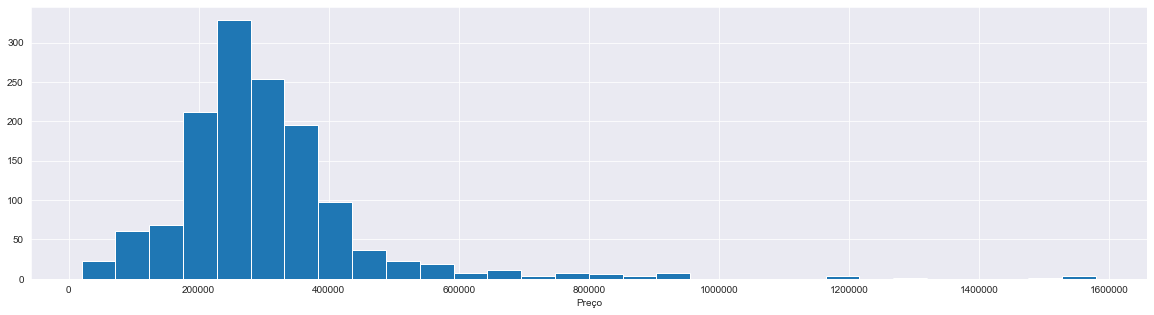

In [108]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
data_imo_moradias['Preço'].hist(bins=30)
plt.xlabel('Preço')

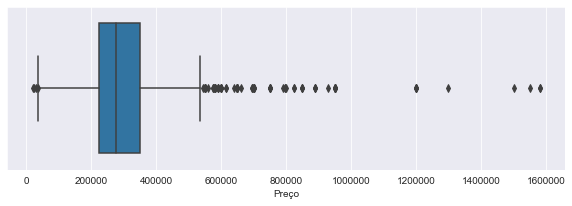

In [109]:
fig = plt.figure(figsize = (10,3))
sns.boxplot(x=data_imo_moradias['Preço'])

*Relação entre o Preço e outras variáveis*

Text(0, 0.5, 'Preço')

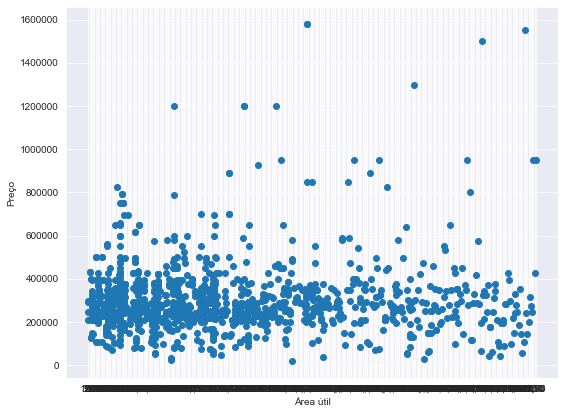

In [110]:
fig = plt.figure(figsize = (30,15))

ax1 = fig.add_subplot(2,3,1)
ax1.scatter(data_imo_moradias['Área útil m/2'], data_imo_moradias['Preço'])
ax1.set_xlabel('Área útil')
ax1.set_ylabel('Preço')

*Relacionamento do 'Preço' com outras features categóricas importantes*

In [111]:
cat_data = data_imo_moradias[['Freguesia']]

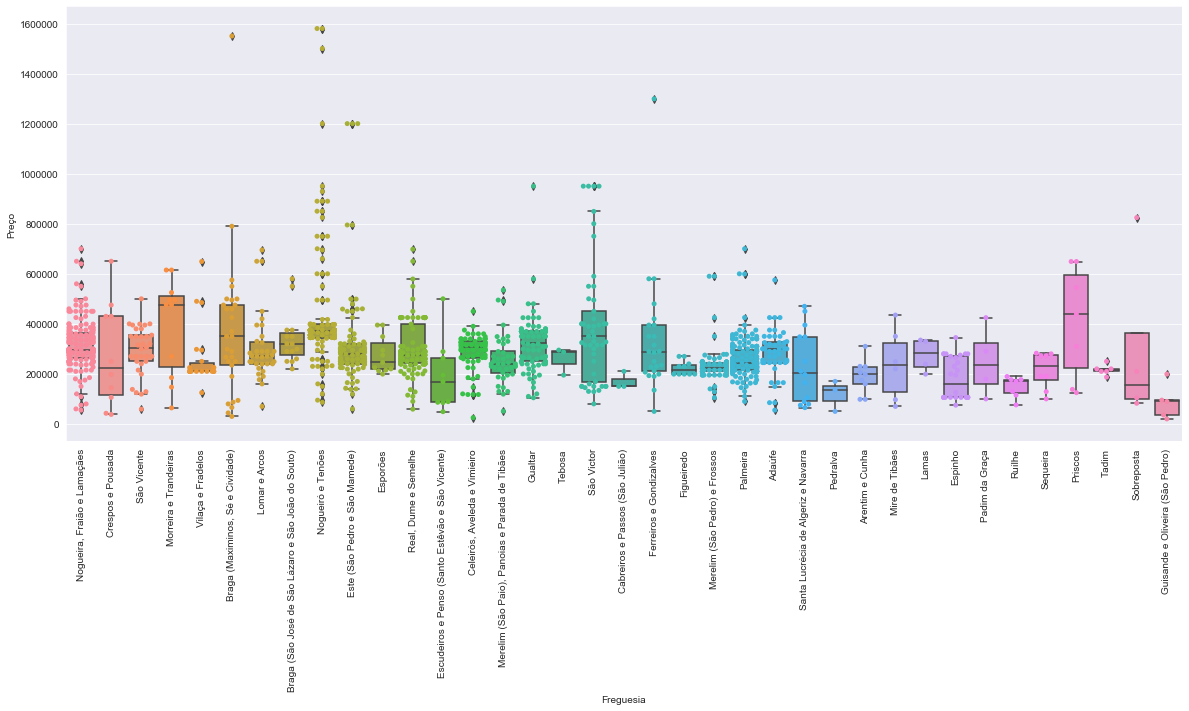

In [112]:
for cat in cat_data.dtypes[:10].index.values:
    plt.figure(figsize=(20, 8))
    plt.xticks(rotation=90)
    sns.boxplot(x=cat, y='Preço', data=data_imo_moradias) 
    sns.swarmplot(x=cat, y='Preço', data=data_imo_moradias)
    plt.show()

**Remoção de outliers (Quantos eliminar???)**

In [113]:
outliers = data_imo_moradias.loc[data_imo_moradias['Preço'] > 1000000].index
data_imo_moradias = data_imo_moradias.drop(outliers)
data_imo_moradias.index = np.arange(1, len(data_imo_moradias) + 1)
data_imo_moradias.shape

(1364, 128)

Text(0.5, 0, 'Preço')

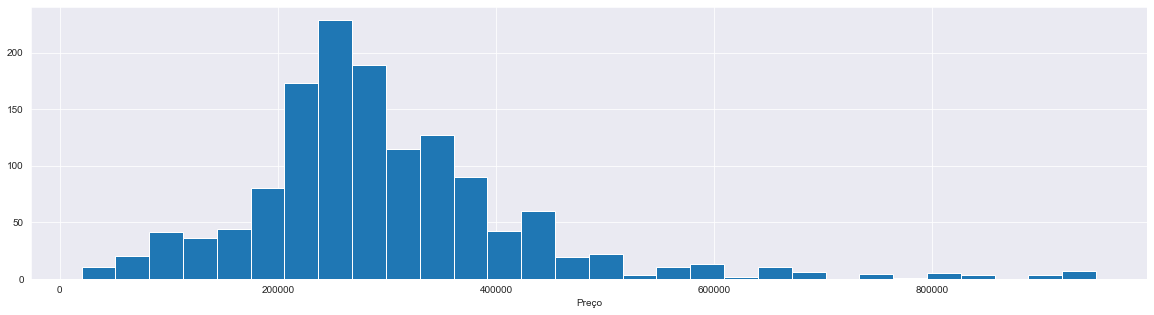

In [114]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
data_imo_moradias['Preço'].hist(bins=30)
plt.xlabel('Preço')

**Dados em falta por coluna**

In [119]:
pd.set_option('display.max_rows', None)
percent_missing = data_imo_moradias.isnull().sum() * 100 / len(data_imo_moradias)
missing_value_data_imo_moradias_columns = pd.DataFrame({'percent_missing (%)': percent_missing})
sort_data = missing_value_data_imo_moradias_columns.copy()
sort_data.sort_values('percent_missing (%)', inplace=True, ascending=False)
sort_data

,percent_missing (%)
Condição,24.780059
Tipo de imóvel,0.000000
Preço,0.000000
Preço m/2,0.000000
Freguesia,0.000000
Latitude,0.000000
Longitude,0.000000
Tipologia,0.000000
Área útil m/2,0.000000


**Remover colunas que tenham mais de 30% (?) de missing values**

In [116]:
a_manter = list(missing_value_data_imo_moradias_columns.index[missing_value_data_imo_moradias_columns['percent_missing (%)'] < 30])
data_imo_moradias = data_imo_moradias[a_manter]
data_imo_moradias

,Tipo de imóvel,Preço,Preço m/2,Freguesia,Latitude,Longitude,Tipologia,Área útil m/2,Condição
1,Moradia,297500,1 534,"Nogueira, Fraião e Lamaçães",41.542361,-8.391225,T3,194,NaN
2,Moradia,430000,1 419,Crespos e Pousada,41.598227,-8.337338,T6,303,Usado
3,Moradia,399900,3 333,São Vicente,41.553279,-8.420480,T4,120,Usado
4,Moradia,324000,1 117,"Nogueira, Fraião e Lamaçães",41.540620,-8.396835,T4,290,NaN
5,Moradia,147000,401,Morreira e Trandeiras,41.495740,-8.410284,T3,367,Usado
...,...,...,...,...,...,...,...,...,...
1360,Moradia,220000,917,Gualtar,41.567980,-8.387990,T4,240,NaN
1361,Moradia,183000,963,Palmeira,41.583332,-8.433333,T3,190,Usado
1362,Moradia,240000,800,Gualtar,41.564922,-8.388491,T4,300,Em construção
1363,Moradia,400000,2 857,São Victor,41.552510,-8.414089,T4,140,Em construção


**Dados em falta por linha**

In [117]:
percent_missing = (1 - data_imo_moradias.apply(lambda x: x.count(), axis=1) / len(data_imo_moradias.columns)) * 100
missing_value_data_imo_moradias_rows = pd.DataFrame({'percent_missing (%)': percent_missing})
sort_data = missing_value_data_imo_moradias_rows.copy()
sort_data.sort_values('percent_missing (%)', inplace=True, ascending=False)
sort_data

,percent_missing (%)
1,11.111111
291,11.111111
302,11.111111
301,11.111111
300,11.111111
...,...
504,0.000000
503,0.000000
502,0.000000
501,0.000000


**Remover linhas com percentagem de dados em falta superior a 50%**

In [118]:
a_excluir = missing_value_data_imo_moradias_rows[(missing_value_data_imo_moradias_rows['percent_missing (%)'] >= 50)]
data_imo_moradias = data_imo_moradias.drop(a_excluir.index)
data_imo_moradias.index = np.arange(1, len(data_imo_moradias) + 1)

**Inserir dados em falta**